## K-means

### 项目背景：
#### The difference between KNN and kmeans
首先，Knn与K-means模型都以K字母开头，从中文看很容易引起误会，认为两者是相似的算法或原理上有相似性。
**实际上，模型名中K是指K个的意思，二者是十分不同的两种算法模型。**

#### Knn：
knn中利用与预测样本点距离最近的K个训练集样本标签的（加权）投票结果，按少数服从多数原则判定预测样本类别；它是一种lazy-learning模型，并不靠训练产生一个相对固定的模型进行预测，每次调用都需要大量的计算时间。

#### K-means:
K-means中的K，是我们指定的希望聚合成的簇的个数；算法：
1. 首先，随机生成k个点作为各簇的聚类中心；
2. 然后，计算每个训练集样本点与各簇中心的距离，并将样本点分到距离最近的簇；
3. 最后，计算簇内所有样本点特征的均值，作为下一轮迭代计算的初始簇中心
4. 直到满足设定迭代次数，或当簇中心基本不变（前后两次迭代簇中心距离小于阈值）时停止训练

### 目的:
根据原理，从零开始手动实现算法过程，加深对算法的理解

In [7]:
# 数据读取
import pandas as pd
data = pd.read_csv(r'Data\K-means\data.txt',sep='\n',header=None,names=['coordination_source'])
# data

# 数据预处理
import re
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
city_name = [pattern.findall(str(i))[0][0] for i in data['coordination_source']]
city_gps = [(float(pattern.findall(str(i))[0][1]),float(pattern.findall(str(i))[0][2])) for i in data['coordination_source']]
city_info = {'name':city_name,'gps': city_gps}
# city_info['gps']


In [8]:
# 定义距离计算公式，采用Haversine距离
import math
def Haversine_Distance(pointA, pointB):
    #地球半径约为
    radius = 6371  # km
    lon1, lat1 = pointA
    lon2, lat2 = pointB
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return abs(d)


In [9]:
# 定义K-means函数
import random
import numpy as np
from collections import defaultdict
def Kmeans_Function(train_iter, k_num, num_epochs, stop_d):
    '''
    k均值聚类
    :param train_iter: 待聚类数据集
    :param k_num: 聚类簇数
    :param num_epochs: 最大迭代次数
    :param stop_d: 簇中心稳定判定差异阈值
    :return:
    '''
    long = list(zip(*train_iter['gps']))[0]
    lat = list(zip(*train_iter['gps']))[1]
    # 随机初始化 K 个簇中心点
    cluster_point = defaultdict(list)
    cluster_point[0] = [(random.uniform(min(long),max(long)), random.uniform(min(lat),max(lat))) for k in range(k_num)]
    # 聚类迭代
    cluster = defaultdict(dict)
    for i in range(num_epochs):
        cluster[i+1] = {k:[] for k in range(k_num)}
        # 样本点分簇
        for j in range(len(city_gps)):
            cluster_index,_ = min([(k,Haversine_Distance(city_gps[j],cluster_point[i][k])) for k in range(k_num)],key=lambda x:x[1])
            cluster[i+1][cluster_index].append(city_gps[j])
        # 更新簇中心
        cluster_point[i+1]=[tuple(np.mean(cluster[i+1][k],axis=0)) for k in range(k_num)]
        # 判断簇心是否稳定
        if max([Haversine_Distance(cluster_point[i][k],cluster_point[i+1][k]) for k in range(k_num)]) <= stop_d: return cluster_point[i+1]
    return cluster_point[i+1]


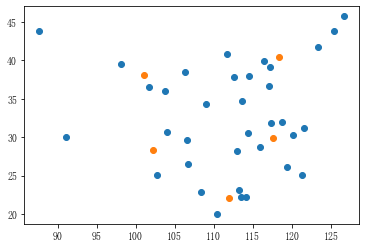

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

centers = Kmeans_Function(city_info,5,1000,5)
plt.scatter(*zip(*city_info['gps']))
plt.scatter(*zip(*centers))

